# **Part 3b:** Feature Importance

In [1]:
# Public libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from tqdm.notebook import tqdm

# Local libraries
import tools.classification as cl

## Parameters

In [2]:
digits = ['zero', 'oh', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

keywords = ['one', 'two', 'three']

linestyles = ['dashed', 'dotted', 'dashdot']
linecolors = ['C0', 'C1', 'C2', 'C3']

num_words = len(digits)

dirnames = ['Results/TIDIGITS/layer_1/e-i/w0.5_tau0.5_dmax3/formants/',
            'Results/TIDIGITS/layer_1/e-i/w0.5_tau0.5_dmax3/output/',
            'Results/TIDIGITS/layer_1/tde/output/',
            'Results/TIDIGITS/layer_2/e-i/']

dir_inds = [[0, 1, 2, 3]]

labels = ["Formants",
          "E-I layer 1",
          "TDEs",
          "E-I layer 2"]

num_neur = [32, 174, 180, 156]

## Train and Test Classifier

In [3]:
# Result dictionary
importances = {}

# Loop over keywords
for keyword in keywords:
    
    # Loop over result datasets
    for i, inds in enumerate(tqdm(dir_inds, desc='Result sets')):

        # Get names of directories
        dirs = []
        for ind in inds:
            dirs.append(dirnames[ind])

        # Get keyword index
        kw_ind = digits.index(keyword)
            
        # Create classification model
        model = linear_model.LogisticRegression(solver = 'liblinear',
                                                multi_class = 'ovr')
        
        # Train model
        score_train = cl.train(model, 'all', kw_ind, num_words, dirs, scale_data=False)
        
        # Get feature importance
        importances[keyword] = cl.feature_importance(model, kw_ind, num_words, dirs, scale_data=False)

Result sets:   0%|          | 0/1 [00:00<?, ?it/s]

Result sets:   0%|          | 0/1 [00:00<?, ?it/s]

Result sets:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature-Importance Plot

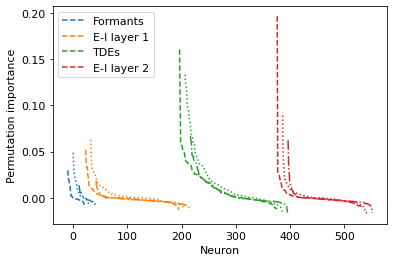

In [4]:
plt.rcParams['font.size'] = '11'
plt.figure(1)

# Loop over keywords
for j, keyword in enumerate(keywords):
    
    # Get importance means
    mean = importances[keyword].importances_mean

    start = 0

    # Loop over network layers
    for i in range(len(num_neur)):

        # Get stop index
        stop = start + num_neur[i]

        # Select and sort data
        x = np.arange(start, stop)
        ind = np.argsort(mean[x]) + start
        ind = np.flip(ind)
        
        # Horizontal offset for visibility
        x = x + 10*(j-1)

        plt.plot(x, mean[ind], color=linecolors[i], linestyle = linestyles[j])    
        
        # Update start index for next iteration
        start = stop
        
plt.xlabel("Neuron")
plt.ylabel("Permutation importance")
plt.legend(labels, loc='upper left')
plt.savefig('Figures/feature_importance.pdf')